### Importing Libraries 

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

### Getting the data

In [4]:
train = pd.read_csv("C:/Users/Ashish/Desktop/Python Projects/Titanic problem/train.csv")
test  = pd.read_csv("C:/Users/Ashish/Desktop/Python Projects/Titanic problem/test.csv")

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
train.isnull().count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            891
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          891
Embarked       891
dtype: int64

In [10]:
train.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [11]:
(train.isnull().sum()/train.isnull().count()*100).sort_values(ascending = False)

Cabin          77.104377
Age            19.865320
Embarked        0.224467
Fare            0.000000
Ticket          0.000000
Parch           0.000000
SibSp           0.000000
Sex             0.000000
Name            0.000000
Pclass          0.000000
Survived        0.000000
PassengerId     0.000000
dtype: float64

- train.isnull().sum() is used to count the number of null observations in a feature

- train.count(): is used to count the number of observations in a feature excluding the NaN observations

- train.isnull().count(): is used to count the number of observations in a feature including the NaN observations

In [12]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Visualizing Age and Sex Features

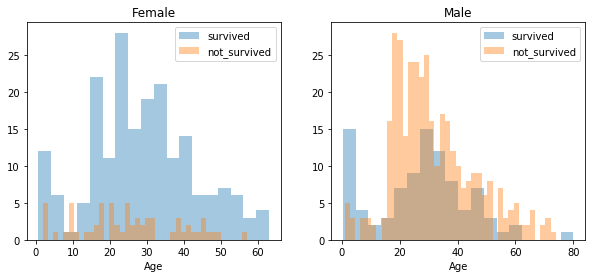

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = train[train['Sex']=='female']
men = train[train['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = "survived", ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = "not_survived", ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = "survived", ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = "not_survived", ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

F:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


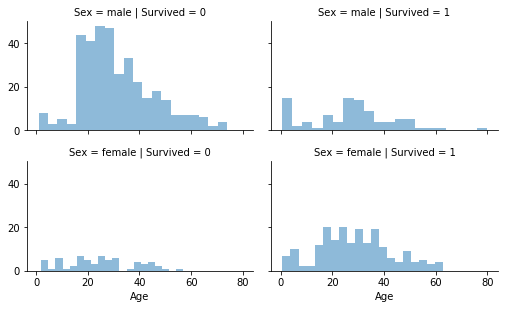

In [16]:
grid = sns.FacetGrid(train, col='Survived', row='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

F:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


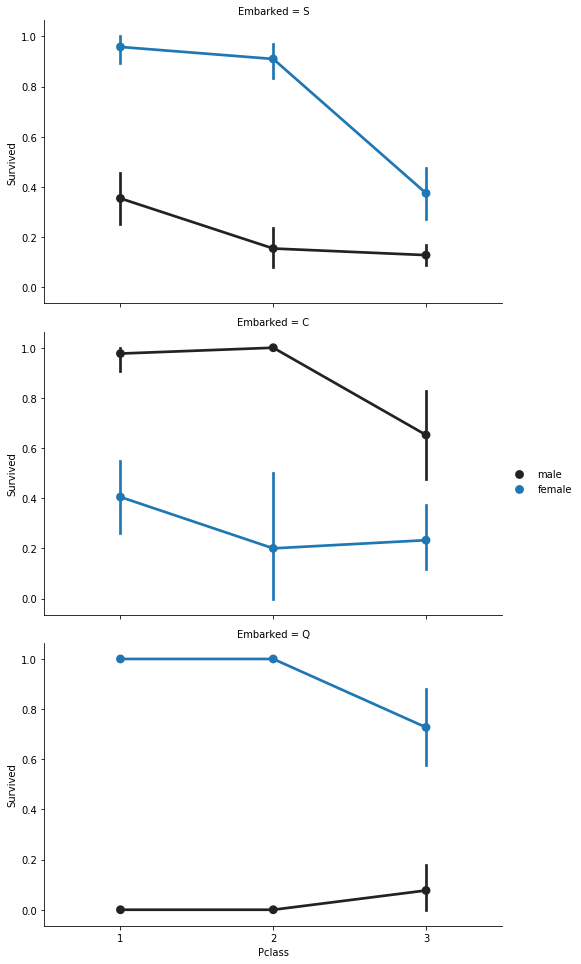

In [15]:
FacetGrid = sns.FacetGrid(train, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

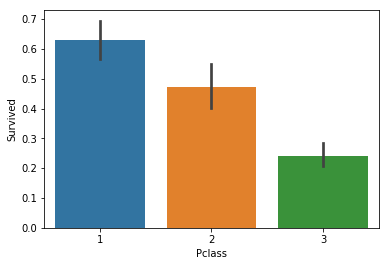

In [13]:
sns.barplot(x='Pclass', y='Survived', data=train)

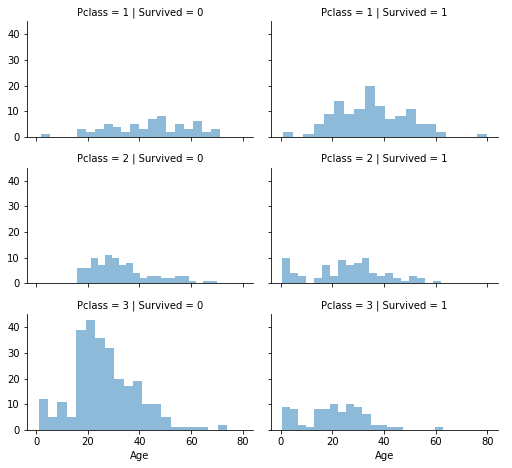

In [14]:
grid = sns.FacetGrid(train, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

In [15]:
train["relatives"] = train["SibSp"] + train["Parch"]
test["relatives"] = test["SibSp"] + test["Parch"]

In [16]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [17]:
train.relatives.value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: relatives, dtype: int64

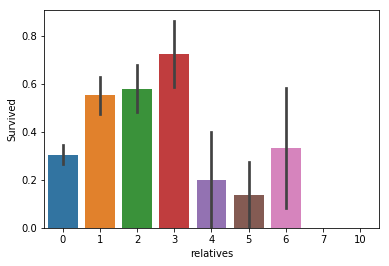

In [18]:
sns.barplot(x = "relatives", y = "Survived", data = train)

### Data Processing

1. Removing Unwanted column: PassengerId

In [19]:
train = train.drop("PassengerId", axis = 1)

In [20]:
train.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,4
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,2
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1


In [21]:
data = [train, test]

for dataset in data:
    mean = train["Age"].mean()
    std = test["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train["Age"].astype(int)
train["Age"].isnull().sum()

0

In [22]:
train['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [23]:
common_value = 'S'
data = [train, test]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [24]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,1
4,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,0


In [25]:
train = train.drop(["Name", "Ticket", "Fare", "Cabin"], axis = 1)

In [26]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,relatives
0,0,3,male,22,1,0,S,1
1,1,1,female,38,1,0,C,1
2,1,3,female,26,0,0,S,0
3,1,1,female,35,1,0,S,1
4,0,3,male,35,0,0,S,0


In [27]:
### Convert Sex and Embarked feature into numeric

gender = {"female":0, "male":1}
data = [train, test]
for dataset in data:
    dataset["Sex"] = dataset["Sex"].map(gender)

In [28]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,relatives
0,0,3,1,22,1,0,S,1
1,1,1,0,38,1,0,C,1
2,1,3,0,26,0,0,S,0
3,1,1,0,35,1,0,S,1
4,0,3,1,35,0,0,S,0


In [29]:
train.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [30]:
ed = {"S":1, "C":2, "Q":3}
data = [train, test]
for dataset in data:
    dataset["Embarked"] = dataset["Embarked"].map(ed)

In [31]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,relatives
0,0,3,1,22,1,0,1,1
1,1,1,0,38,1,0,2,1
2,1,3,0,26,0,0,1,0
3,1,1,0,35,1,0,1,1
4,0,3,1,35,0,0,1,0


Now we need to convert the ‘age’ feature. First we will convert it from float into integer. Then we will create the new ‘AgeGroup” variable, by categorizing every age into a group.

In [32]:
data = [train, test]
for dataset in data:
    dataset["Age"] = dataset["Age"].astype("int")
    dataset.loc[(dataset["Age"] <= 11), "Age"] = 0
    dataset.loc[(dataset["Age"]> 11) & (dataset["Age"] <= 18), "Age"] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

In [33]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,relatives
0,0,3,1,2,1,0,1,1
1,1,1,0,5,1,0,2,1
2,1,3,0,3,0,0,1,0
3,1,1,0,5,1,0,1,1
4,0,3,1,5,0,0,1,0


### Creating a new feature

- Age times Class

In [34]:
data = [train, test]
for dataset in data:
    dataset["Age_class"] = dataset["Pclass"] * dataset["Age"]

In [35]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,relatives,Age_class
0,0,3,1,2,1,0,1,1,6
1,1,1,0,5,1,0,2,1,5
2,1,3,0,3,0,0,1,0,9
3,1,1,0,5,1,0,1,1,5
4,0,3,1,5,0,0,1,0,15


In [36]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,Age_class
0,892,3,"Kelly, Mr. James",1,2,0,0,330911,7.8292,NaN,3,0,6
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,5,1,0,363272,7.0000,NaN,1,1,15
2,894,2,"Myles, Mr. Thomas Francis",1,3,0,0,240276,9.6875,NaN,3,0,6
3,895,3,"Wirz, Mr. Albert",1,5,0,0,315154,8.6625,NaN,1,0,15
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,5,1,1,3101298,12.2875,NaN,1,2,15


In [37]:
test = test.drop(["PassengerId", "Name", "Ticket", "Fare", "Cabin"], axis = 1)

In [38]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked,relatives,Age_class
0,3,1,2,0,0,3,0,6
1,3,0,5,1,0,1,1,15
2,2,1,3,0,0,3,0,6
3,3,1,5,0,0,1,0,15
4,3,0,5,1,1,1,2,15


In [39]:
print(train.shape)
print(test.shape)

(891, 9)
(418, 8)


In [40]:
print(train.columns)
print(test.columns)

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked',
       'relatives', 'Age_class'],
      dtype='object')
Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked', 'relatives',
       'Age_class'],
      dtype='object')


### Building Machine Learning Models

In [42]:
X_train = train.drop("Survived", axis = 1)
y_train = train["Survived"]
X_test = test

1. Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
logreg = LogisticRegression()

In [45]:
logreg.fit(X_train, y_train)

F:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [46]:
y_pred = logreg.predict(X_test)

In [48]:
acc_logreg = round(logreg.score(X_train, y_train)*100,2)

In [49]:
acc_logreg

80.13

2. KNearest Neighbors

In [50]:
from sklearn.neighbors import KNeighborsClassifier

In [51]:
knn = KNeighborsClassifier()

In [52]:
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [53]:
acc_knn = round(knn.score(X_train, y_train)*100, 2)

In [54]:
acc_knn

83.61

3. Random Forest 

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
ran_for = RandomForestClassifier(n_estimators = 100)

In [57]:
ran_for.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [58]:
y_pred = ran_for.predict(X_test)

In [59]:
acc_ran_for = round(ran_for.score(X_train, y_train)*100, 2)

In [60]:
acc_ran_for

87.54

4. Gaussian Naive Bias

In [61]:
from sklearn.naive_bayes import GaussianNB

In [62]:
gaussian = GaussianNB()

In [63]:
gaussian.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [64]:
y_pred = gaussian.predict(X_test)

In [66]:
acc_gaussian = round(gaussian.score(X_train, y_train)*100, 2)

In [67]:
acc_gaussian

77.89

5. Decision Tree

In [68]:
from sklearn.tree import DecisionTreeClassifier

In [69]:
tree = DecisionTreeClassifier()

In [70]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [71]:
y_pred = tree.predict(X_test)

In [72]:
acc_tree = round(tree.score(X_train,y_train)*100,2)

In [73]:
acc_tree

87.54

6. Linear SVM

In [75]:
from sklearn.svm import LinearSVC 

In [76]:
svm = LinearSVC()

In [77]:
svm.fit(X_train, y_train)

F:\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [78]:
y_pred = svm.predict(X_test)

In [79]:
acc_svm = round(svm.score(X_train, y_train) * 100,2)

In [80]:
acc_svm

79.57

### Which Is The Best Model??

In [82]:
model = pd.DataFrame({"Model": ["Logistic Regression", "K Nearest Neighbors", "Random Forest", "Gaussian Naive Bias", "Decision Tree" , "Linear SVM"], "Score" : [acc_logreg, acc_knn, acc_ran_for, acc_gaussian, acc_tree, acc_svm]})

In [83]:
model

,Model,Score
0,Logistic Regression,80.13
1,K Nearest Neighbors,83.61
2,Random Forest,87.54
3,Gaussian Naive Bias,77.89
4,Decision Tree,87.54
5,Linear SVM,79.57


In [84]:
model.index = model["Score"]

In [85]:
model

,Model,Score
Score,,
80.13,Logistic Regression,80.13
83.61,K Nearest Neighbors,83.61
87.54,Random Forest,87.54
77.89,Gaussian Naive Bias,77.89
87.54,Decision Tree,87.54
79.57,Linear SVM,79.57


In [86]:
model.drop("Score", axis = 1)

,Model
Score,
80.13,Logistic Regression
83.61,K Nearest Neighbors
87.54,Random Forest
77.89,Gaussian Naive Bias
87.54,Decision Tree
79.57,Linear SVM


In [92]:
model.sort_index(ascending = False)

,Model,Score
Score,,
87.54,Random Forest,87.54
87.54,Decision Tree,87.54
83.61,K Nearest Neighbors,83.61
80.13,Logistic Regression,80.13
79.57,Linear SVM,79.57
77.89,Gaussian Naive Bias,77.89


In [93]:
model.drop("Score", axis = 1, inplace = True)

In [95]:
model = model.sort_index(ascending = False)

In [96]:
model

,Model
Score,
87.54,Random Forest
87.54,Decision Tree
83.61,K Nearest Neighbors
80.13,Logistic Regression
79.57,Linear SVM
77.89,Gaussian Naive Bias


From the above dataset, it is clear that Random forest is the best model among the 6 models as it has the highest accuracy

### K-Fold Cross Validation of Random Forest

In [97]:
from sklearn.model_selection import cross_val_score

In [98]:
rf = RandomForestClassifier(n_estimators = 100)

In [99]:
score = cross_val_score(rf, X_train, y_train, cv = 10, scoring = "accuracy")

In [100]:
print(score)
print("Mean: ", score.mean())
print("Standard Deviation: ", score.std())

[0.73333333 0.76666667 0.75280899 0.82022472 0.86516854 0.83146067
 0.79775281 0.79775281 0.86516854 0.81818182]
Mean:  0.8048518896833503
Standard Deviation:  0.04216693885758299


- This looks much more realistic than before. Our model has a average accuracy of 80.48h a standard deviation of 4 %. The standard deviation shows us, how precise the estimates are .
- This means in our case that the accuracy of our model can differ + — 4%.

In [120]:
important = pd.DataFrame({"Features": X_train.columns, "Importance": np.round(ran_for.feature_importances_, 3)})
important = important.sort_values("Importance", ascending = False).set_index("Features")

In [121]:
important

,Importance
Features,
Sex,0.392
Age_class,0.133
Pclass,0.116
relatives,0.099
Age,0.088
Embarked,0.072
SibSp,0.054
Parch,0.045


In [122]:
import matplotlib.pyplot as plt
import seaborn as sns

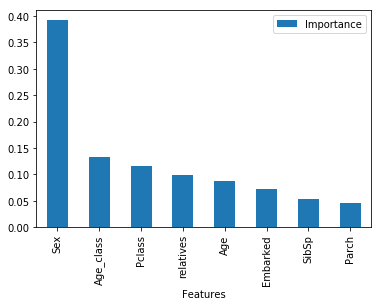

In [127]:
important.plot.bar()

- Sibsp and Parch does not play a significant role in the prediction and hence the two columns can be dropped

In [130]:
train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Parch', 'Embarked', 'relatives',
       'Age_class'],
      dtype='object')

In [131]:
test.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked', 'relatives',
       'Age_class'],
      dtype='object')

In [132]:
train = train.drop("SibSp", axis = 1)
test = test.drop("SibSp", axis = 1)

train = train.drop("Parch", axis = 1)
test = test.drop("Parch", axis = 1)

In [136]:
print(train.columns)
print(test.columns)

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Embarked', 'relatives',
       'Age_class'],
      dtype='object')
Index(['Pclass', 'Sex', 'Age', 'Embarked', 'relatives', 'Age_class'], dtype='object')


### Retraining the Random Forest tree.

In [142]:
X_train = train.drop("Survived", axis=1)
y_train = train["Survived"]
X_test = test

In [143]:
from sklearn.ensemble import RandomForestClassifier

In [163]:
random_forest = RandomForestClassifier(n_estimators = 100, oob_score = True)

In [164]:
random_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [165]:
y_pred = random_forest.predict(X_test)

In [166]:
acc_random_forest = round(random_forest.score(X_train, y_train)*100, 2)

In [167]:
acc_random_forest

86.64

### Calculating the OOB score or Out-of-Bag score

In [169]:
round(random_forest.oob_score_,4)*100

79.80000000000001

### Hyperparameter Tuning

- Below you can see the code of the hyperparamter tuning for the parameters criterion, min_samples_leaf, min_samples_split and n_estimators.

In [178]:
param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5], "min_samples_split" : [2, 4, 10], "n_estimators": [100, 120, 150]}
from sklearn.model_selection import GridSearchCV, cross_val_score
rf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)
clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)
clf.fit(X_train, y_train)
clf.best_params_

F:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'criterion': 'entropy',
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 100}

### Testing the New Hyperparameters

In [189]:
random_forest = RandomForestClassifier(n_estimators = 100, min_samples_split = 2, min_samples_leaf = 5, criterion = "entropy", max_features = "auto", oob_score = True, random_state = 1, n_jobs = -1)

random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)
print(random_forest.score(X_train, y_train))

print("oob: ", round(random_forest.oob_score_, 4)*100)

0.8439955106621774
oob:  81.82000000000001


In [ ]:
#### After tuning the hyper-parameters, the accuracy becomes 84.40% and the oob-score becomes 81.82%